# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [19]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


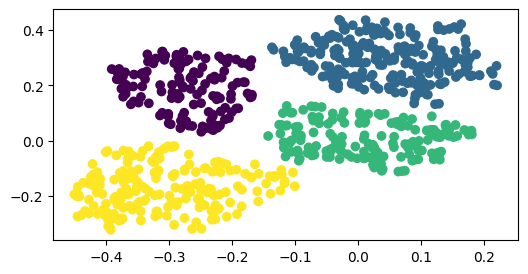

In [20]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [22]:
import numpy as np
# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  # Elegimos los centros iniciales entre el conjunto de datos
  indices_aleatorios = np.random.choice(Dx.shape[0], K, replace=False)
  cDx = Dx[indices_aleatorios]
  return cDx

Los centros iniciales elegidos aleatoriamente son:
[[ 0.180206   0.0364957]
 [-0.292384  -0.222135 ]
 [-0.364217  -0.19315  ]
 [-0.365729  -0.0790398]]


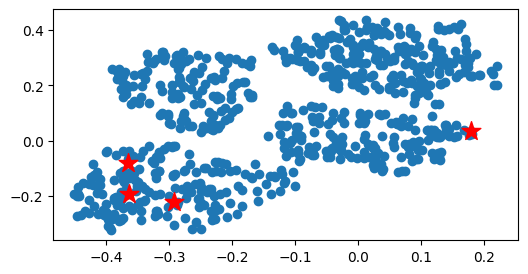

In [23]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [25]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

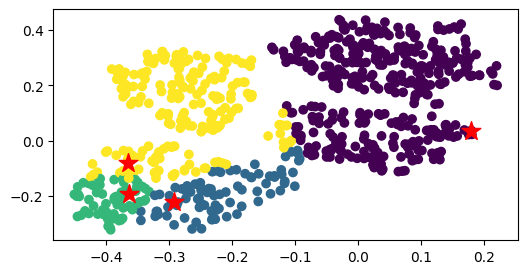

In [26]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [28]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # Obtenemos los índices de los elementos que pertenecen al clúster k
      cluster_indices_in_Dx = np.where(Dyp == k)[0]
      cluster_points = Dx[cluster_indices_in_Dx]

      if len(cluster_points) == 0:
          # Si el clúster está vacío, mantenemos el medoide anterior o lo gestionamos según la lógica deseada
          continue

      # Inicializamos la suma mínima de distancias para este clúster
      min_sum_distances = float('inf')
      new_medoid_index_in_cluster_points = -1

      # Iteramos sobre cada punto del clúster como un candidato a medoide
      for i in range(len(cluster_points)):
          current_candidate_point = cluster_points[i]
          # Calculamos las distancias de este punto candidato a todos los demás puntos del clúster
          distances_from_candidate = distancia_euclidiana_grupo(current_candidate_point, cluster_points)
          sum_current_candidate_distances = np.sum(distances_from_candidate)

          # Si esta suma es menor que la mínima encontrada hasta ahora, actualizamos
          if sum_current_candidate_distances < min_sum_distances:
              min_sum_distances = sum_current_candidate_distances
              new_medoid_index_in_cluster_points = i

      # El nuevo medoide para el clúster k es el punto que minimizó la suma de distancias
      # Necesitamos obtener su índice original en Dx para actualizar cDx
      original_medoid_index_in_Dx = cluster_indices_in_Dx[new_medoid_index_in_cluster_points]
      cDx[k,:] = Dx[original_medoid_index_in_Dx]
  return cDx

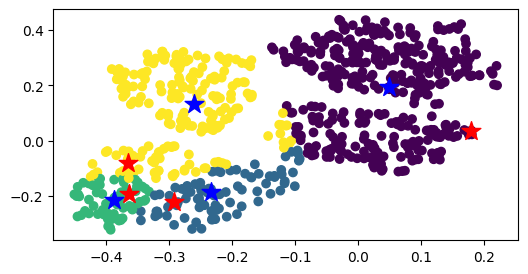

In [29]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [31]:
def MyKMedoide(Dx, K):
  cDx = paso1_elije_medoides(K, Dx)
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)
    # Calcular los nuevos centros
    cDx = paso3_actualiza_medoides(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

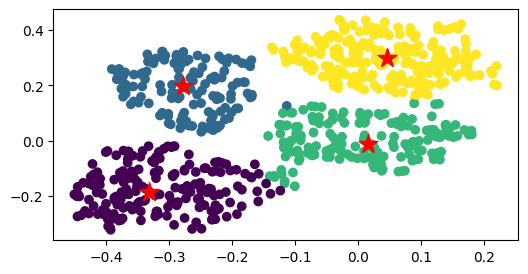

In [32]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


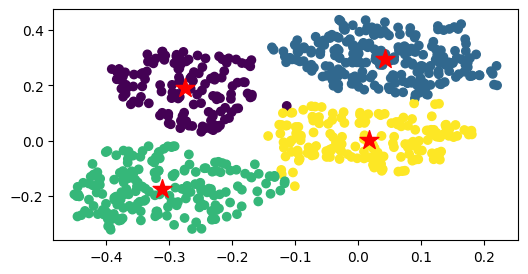

In [33]:
from sklearn.cluster import KMeans

modelo = KMeans(4, random_state=42, n_init=10) # Añadimos random_state y n_init para reproducibilidad
modelo.fit(Dx)
Dyp_sk = modelo.predict(Dx)
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [34]:
from sklearn.metrics import silhouette_score

# Calcular Silhouette Score para K-Medoids
silhouette_kmedoids = silhouette_score(Dx, Dyp)
print(f'Silhouette Score (MyKMedoide): {silhouette_kmedoids:.4f}')

# Calcular Silhouette Score para K-Means++
silhouette_kmeans = silhouette_score(Dx, Dyp_sk)
print(f'Silhouette Score (KMeans++): {silhouette_kmeans:.4f}')

# Conclusión
if silhouette_kmedoids > silhouette_kmeans:
    print('\nConclusión: El algoritmo MyKMedoide obtuvo un mejor Silhouette Score, lo que sugiere que agrupó los datos de manera más efectiva para este dataset.')
elif silhouette_kmeans > silhouette_kmedoids:
    print('\nConclusión: El algoritmo KMeans++ obtuvo un mejor Silhouette Score, lo que sugiere que agrupó los datos de manera más efectiva para este dataset.')
else:
    print('\nConclusión: Ambos algoritmos obtuvieron un Silhouette Score similar para este dataset.')

Silhouette Score (MyKMedoide): 0.5361
Silhouette Score (KMeans++): 0.5362

Conclusión: El algoritmo KMeans++ obtuvo un mejor Silhouette Score, lo que sugiere que agrupó los datos de manera más efectiva para este dataset.


### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


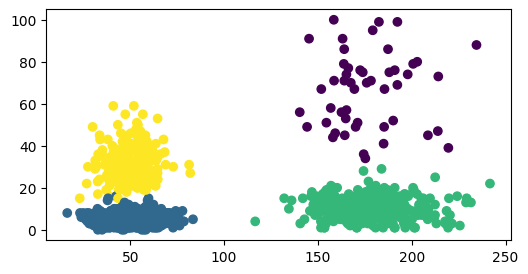

In [35]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

K-Means++ para el nuevo dataset:


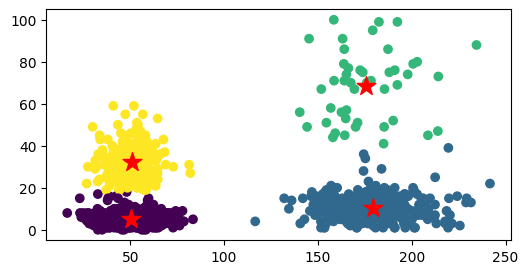

In [36]:
 ## aplica kMeans ++
modelo_nuevo_kmeans = KMeans(4, random_state=42, n_init=10) # Asumimos 4 clusters como en el ejemplo anterior
modelo_nuevo_kmeans.fit(Dx)
Dyp_sk_nuevo = modelo_nuevo_kmeans.predict(Dx)
cDx_sk_nuevo = modelo_nuevo_kmeans.cluster_centers_

print('K-Means++ para el nuevo dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk_nuevo)
ax.scatter(cDx_sk_nuevo[:,0],cDx_sk_nuevo[:,1], marker='*', s=200, c='r')

MyKMedoide para el nuevo dataset:


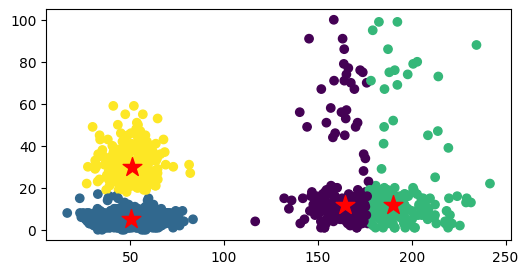

In [37]:
 ## aplica kMedoide
cDx_nuevo, Dyp_nuevo = MyKMedoide(Dx, 4)

print('MyKMedoide para el nuevo dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_nuevo)
ax.scatter(cDx_nuevo[:,0],cDx_nuevo[:,1], marker='*', s=200, c='r')

In [38]:
from sklearn.metrics import silhouette_score

# Calcular Silhouette Score para MyKMedoide en el nuevo dataset
silhouette_kmedoids_nuevo = silhouette_score(Dx, Dyp_nuevo)
print(f'Silhouette Score (MyKMedoide - nuevo dataset): {silhouette_kmedoids_nuevo:.4f}')

# Calcular Silhouette Score para K-Means++ en el nuevo dataset
silhouette_kmeans_nuevo = silhouette_score(Dx, Dyp_sk_nuevo)
print(f'Silhouette Score (KMeans++ - nuevo dataset): {silhouette_kmeans_nuevo:.4f}')

# Conclusión para el nuevo dataset
if silhouette_kmedoids_nuevo > silhouette_kmeans_nuevo:
    print('\nConclusión (nuevo dataset): El algoritmo MyKMedoide obtuvo un mejor Silhouette Score, lo que sugiere que agrupó los datos de manera más efectiva para este dataset.')
elif silhouette_kmeans_nuevo > silhouette_kmedoids_nuevo:
    print('\nConclusión (nuevo dataset): El algoritmo KMeans++ obtuvo un mejor Silhouette Score, lo que sugiere que agrupó los datos de manera más efectiva para este dataset.')
else:
    print('\nConclusión (nuevo dataset): Ambos algoritmos obtuvieron un Silhouette Score similar para este dataset.')

Silhouette Score (MyKMedoide - nuevo dataset): 0.5393
Silhouette Score (KMeans++ - nuevo dataset): 0.5900

Conclusión (nuevo dataset): El algoritmo KMeans++ obtuvo un mejor Silhouette Score, lo que sugiere que agrupó los datos de manera más efectiva para este dataset.


# 🚀 ¡TALLER FINALIZADO!"